<a href="https://colab.research.google.com/github/carolinart/MIT-Applied-DS-Program/blob/main/Capstone_Music_Recommendation_System_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

## **Executive Summary**

This analysis evaluates the performance of various recommendation models with the objective of providing users with the top 5 music recommendations. While one model achieved a higher recall, its reliability was compromised by data sparsity, leading to less dependable predictions. Therefore, the proposed model is the tuned item-item collaborative filtering model, which offers a more reliable performance with a recall of 71.5%.

The data revealed a significant popularity bias, with a small number of songs dominating user interactions, and content-based features, such as song metadata, were not present in the data, suggesting that incorporating these could enhance the personalization and effectiveness of the recommendations, particularly for users with sparse interaction histories.

To address these challenges, a hybrid recommendation system is proposed, combining the strengths of collaborative filtering and content-based methods. This approach pretends to improve both the diversity and personalization of recommendations by leveraging multiple data sources and ensuring that the system remains adaptive to user behavior changes. The proposed model also emphasizes the importance of data quality and the need for continuous model tuning and performance monitoring to maintain and enhance recommendation accuracy over time.

## **Problem Summary**

We live in a highly competitive digital world, and then providing personalized and engaging experiences to users is key for retaining customers and driving platform engagement. In this case, for a music streaming service, effectively recommending songs that align with user preferences is essential to improving user satisfaction, increasing listening time, and reducing churn.

Users can become overwhelmed by so many choices, making it harder for them to discover new content that they might enjoy. Solving this problem helps in delivering a more tailored user experience, which can lead to higher user retention and increased platform usage.

**The goal is to develop a robust recommendation system that can accurately predict and suggest songs to users based on their listening history and preferences**. The system should effectively handle large-scale user interactions, including dealing with sparse data and ensuring recommendations are diverse yet relevant.

## **Solution Summary**

The project aims to solve the problem of personalized music recommendation using data science techniques. Specifically, our objective is to develop a recommendation system that leverages user interaction data (using play counts) to predict and suggest songs that individual users are likely to enjoy.

It explores the performance of various recommendation models, including user-user and item-item collaborative filtering, matrix factorization (SVD), and clustering-based approaches. The proposed solution at first is the tuned item-item collaborative filtering model, because it has the best combination of high performance metric and good results in out-of-sample settings.

**Figure 1** in the Appendix allows to compare visually the different results obtained.

## **Recommendations for Implementation**

Building a recommendation system involves addressing multiple fronts, with a primary focus on enhancing user engagement and loyalty. A key recommendation to achieve these is to **implement a hybrid model that combines user-user, item-item, and content-based filtering to ensure personalized and diverse recommendations**.

Equally important is the integration of **song metadata** -such as genre, likes/dislikes, percentage of time user actually listened to the song, among others- to enhance the accuracy of content-based recommendations. And at last, establishing a feedback loop from users to continuously monitor data quality and make necessary adjustments, which may also increase user loyalty to the platform.

Stakeholders should also consider investing in GPU and Cloud Computing resources, as these technologies provide the computational power needed to effectively work with these models, particularly when implementing complex hybrid approaches.


  #### **Potential Challenges of Proposed Solution**


*   The hybrid model, especially when incorporating user-user, item-item, and content-based filtering, can be computationally intensive. This could lead to high processing times and increased operational costs.
*   As the user base and content library grow, the system might face scalability issues. Managing large-scale data processing, ensuring fast response times, and maintaining model accuracy across a growing dataset could become increasingly difficult. This might involve optimizing data storage and retrieval, and regularly updating models to handle growing data volumes.
* If the system generates recommendations that are not well-received by users, it could negatively impact user experience and lead to disengagement. This is why gathering user feedback and incorporating it into the recommendation system's updates will be critical.





## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

**song_data**

- song_id - A unique id given to every song
- title - Title of the song
- Release - Name of the released album
- Artist_name - Name of the artist
- year - Year of release

**count_data**

- user _id - A unique id given to the user
- song_id - A unique id given to the song
- play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd

# Basic library for data visualization
import matplotlib.pyplot as plt

# Slightly advanced library for data visualization
import seaborn as sns

# To compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# A dictionary output that does not raise a key error
from collections import defaultdict

# A performance metrics in sklearn
from sklearn.metrics import mean_squared_error

### **Load the dataset**

In [ ]:
# Importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/ADSP MIT/Capstone/Milestone/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/ADSP MIT/Capstone/Milestone/song_data.csv')


## **First Checks to Data**
---



### **Understanding the data by viewing a few observations**

In [ ]:
# Display first 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [ ]:
# Display first 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and missing values of each column**

In [ ]:
# Display info of count_df
count_df.info()

count_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


,0
Unnamed: 0,0
user_id,0
song_id,0
play_count,0


In [ ]:
# Display info of song_df
song_df.info()
song_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


,0
song_id,0
title,17
release,7
artist_name,0
year,0


#### **Observations and Insights:**

* *Data Types:* The identifier columns (i.e. _song_id_ and _user_id_), as well as the song title, released album and artist's name are of type "object", indicating that they contain string values. The play count and year of release are both of type "int64", meaning they are integers.


* *Missing values:* The dataset containing user play counts has no missing values in any of its columns. However, the dataset with song details has 17 missing values in the song title column (_title_) and 7 missing values in the released album column (_release_). It is not a number to be worried about though, since dataset has 1 M entries, so missing values are much less than 1% of the observations. However, let's see how these null values affect the merged dataset.


In [ ]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously

full_data = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on = "song_id", how = "left")

# Drop the column 'Unnamed: 0'
full_data = full_data.drop(['Unnamed: 0'], axis = 1)

## Name the obtained dataframe as "df"
df = full_data.copy(deep = True)

In [ ]:
df.isnull().sum()

,0
user_id,0
song_id,0
play_count,0
title,0
release,0
artist_name,0
year,0


Interestingly, after the merging, we have zero missing values across all rows for each respective column, so this is no longer a problem for the recommendation system building.

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [ ]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder

# Create label encoder instance
label_encoder = LabelEncoder()

df['user_id'] = label_encoder.fit_transform(df['user_id']) # Apply label encoding to "user_id"

df['song_id'] = label_encoder.fit_transform(df['song_id']) # Apply label encoding to "song_id"

In [ ]:
df.head(5)

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?


## **Data Sampling**
---



A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

### Playing count Cutoff

In [ ]:
df.shape

(2000000, 7)

So, the dataset contains 2M of observations, but to trim the dataset to a more manageable size as stated above, we want to first calculate the total sum of play counts by users, and see its distribution to determine a nice cutoff that balances reducing the dataset with retaining enough data for a meaningful analysis.

In [ ]:
df_agg = df.copy()
df_agg = df_agg.groupby('user_id')['play_count'].sum().reset_index() # Calculate sum of play counts by user

df_agg.head(3)

,user_id,play_count
0,0,17
1,1,6
2,2,24


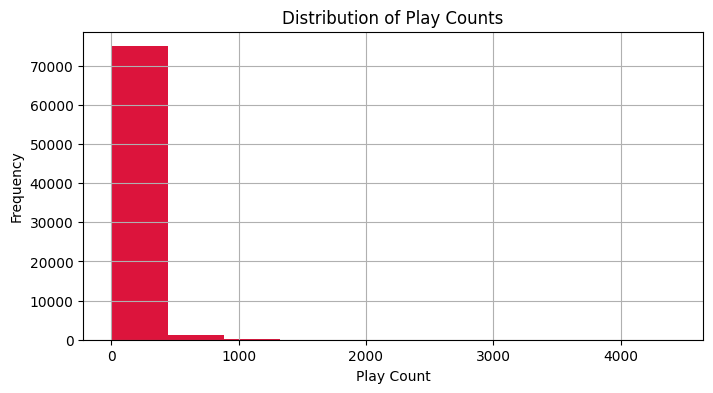

In [ ]:
# Plotting the histogram of play_count
plt.figure(figsize=(8, 4))
df_agg['play_count'].hist(bins=10, color = 'crimson')
plt.title('Distribution of Play Counts')
plt.xlabel('Play Count')
plt.ylabel('Frequency')
plt.show()

From the histogram, we can see that sum of _play_count_ by users is heavily skewed to the right, meaning that a small number of users have very high play count, while most users have relatively low play counts. For the same reason, it is not possible to visualize a good cutoff number, so let's see the descriptive statistics for _play_count_.

In [ ]:
df_agg.play_count.describe()

,play_count
count,76353.000000
mean,79.773801
std,116.299183
min,1.000000
25%,17.000000
50%,41.000000
75%,95.000000
max,4426.000000


Evidently, the play counts vary very widely, with a standard deviation of approximately 116. Nonetheless, in this case we are going to focus on keeping majority of data, but removing the least active users (setting a cutoff at the median of 41 play counts per user).

In [ ]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [ ]:
# We want our users to have listened at least 41 songs
SONG_COUNT_CUTOFF = 41

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [ ]:
df.shape

(1043993, 7)

After filtering users with less interactions than the median, we kept only 1.043.993 observations, which is still a little large for the current exercise, so we are going to apply another cutoff below.

###Listener count cutoff
This is a second cutoff we can apply, where we retain only the songs that have been listened to by at least N users. Similar to the play count threshold, this cutoff will be determined using a data-driven approach rather than relying on gut feeling.

In [ ]:
df_agg = df.copy()
df_agg = df_agg.groupby('song_id')['play_count'].sum().reset_index() # Calculate sum of play counts by song

df_agg.head(3)

,song_id,play_count
0,0,99
1,1,267
2,2,71


In [ ]:
df_agg.play_count.describe()

,play_count
count,10000.000000
mean,292.786300
std,577.416086
min,23.000000
25%,109.000000
50%,169.000000
75%,291.000000
max,17501.000000


Playing count by songs has a broader variability than playing count by users, with a standard deviation of approximately 577. And we are going to take only the songs that have been listened to by at least 109 users, as the 25th percentile suggests, since here we only intend to exclude the bottom 25% of songs that have been listened to the least by users.

In [ ]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [ ]:
# We want our song to be listened by atleast 109 users to be considred
LISTENER_COUNT_CUTOFF = 109

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

In [ ]:
df_final.shape

(618490, 7)

After our second filtering, we kept 618.490 observations, which corresponds to almost 32% of the original data, but we find it a good sample, since we intend to target only active users and relevant songs to recommend to those users.

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [ ]:
# Proving the previous assertion
df_final.play_count.describe()

,play_count
count,618490.000000
mean,2.838379
std,6.136508
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,2213.000000


Although the maximum value of _play_count_ in the final dataset is 2213, very aligned with what we saw in the histogram with the playing counts aggregated by users, there are very few users who have played a song a high number of times. That is also clear here, given that the 75th percentile is only 3, most songs have very low engagement per users, with only a small fraction of songs being played frequently. So, we are again performing a last filter, where we're keeping only those records with _play_count_ less than or equal to 5.

This filter might be crucial to ensure that the system does not just recommend primarily popular songs, but also introduces users to less common songs that match their tastes.

In [ ]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final[df_final.play_count<=5]

In [ ]:
# Check the shape of the data
df_final.shape

(552373, 7)

By applying the last filter, the dataset obtained, has 552.373 records, which would be enough to build a recommendation system with relevant users (in terms of interaction) and songs (in terms of number of times users have played them).


## **Exploratory Data Analysis**


---



### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [ ]:
# Display total number of unique user_id
print(df_final['user_id'].nunique())

13590


Total number of unique song id

In [ ]:
# Display total number of unique song_id
print(df_final['song_id'].nunique())

2570


Total number of unique artists

In [ ]:
# Display total number of unique artists
print(df_final['artist_name'].nunique())

925


#### **Observations and Insights:**

* With 13,590 unique users, we have a diverse group of users interacting with the music catalog. This broad user base provides a wealth of data for analyzing listening habits, but it also suggests that user preferences are likely very varied.

* With 2,570 unique songs in the dataset, we have a varied pool of content that users can engage with. Given that most songs have been played only a few times, there is an opportunity to push lesser-known tracks to users who might not have explored them yet.

* The dataset includes 925 unique artists. If we divide the unique song number with this number, we get an average of about 2.8 (approx 3) songs per artist.


### **Let's find out about the most interacted songs and interacted users**

### Most interacted songs

In [ ]:
# Calculate the sum of play_count by song ID
song_interactions = df_final.groupby('song_id')['play_count'].sum().reset_index()

top_10_songs = pd.DataFrame(song_interactions.sort_values(by = 'play_count', ascending = False))

In [ ]:
# Temporary dataset with song info
song_info = df_final.copy()
song_info = song_info.drop(columns=['user_id', 'play_count', 'release']).drop_duplicates()

In [ ]:
top_10_songs_info = pd.merge(top_10_songs, song_info, on = 'song_id', how = 'left')

In [ ]:
top_10_df = top_10_songs_info.sort_values(by = 'play_count', ascending = False).head(10)
top_10_df

,song_id,play_count,title,artist_name,year
0,352,4860,Dog Days Are Over (Radio Edit),Florence + The Machine,0
1,2220,4847,Sehr kosmisch,Harmonia,0
2,5531,4023,Secrets,OneRepublic,2009
3,8582,3447,Use Somebody,Kings Of Leon,2008
4,4448,3419,Fireflies,Charttraxx Karaoke,2009
5,1334,3317,Hey_ Soul Sister,Train,0
6,7416,3214,Revelry,Kings Of Leon,2008
7,317,3050,Undo,Björk,2001
8,4152,3006,The Scientist,Coldplay,2002
9,8092,2953,OMG,Usher featuring will.i.am,2010


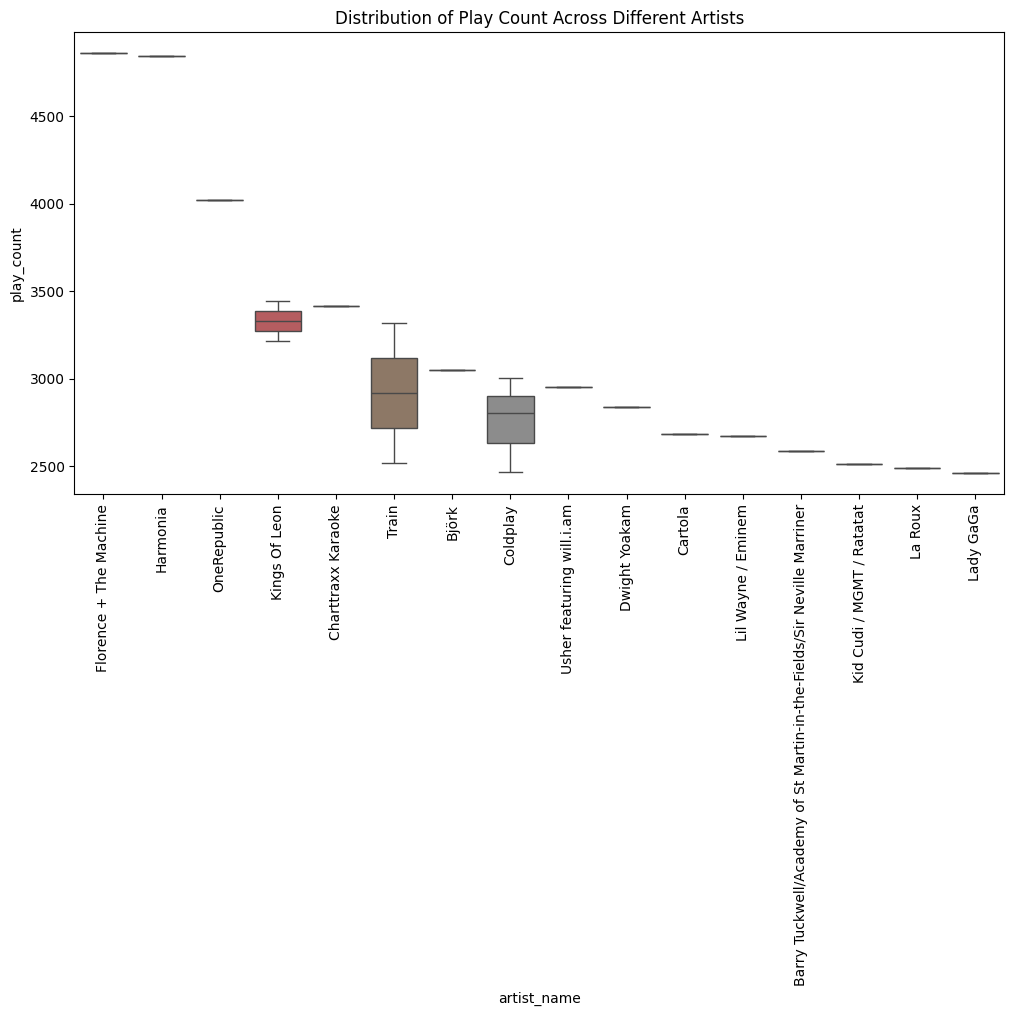

In [ ]:
top_20_df = top_10_songs_info.sort_values(by = 'play_count', ascending = False).head(20)
top_20_df

plt.figure(figsize=(12, 6))
sns.boxplot(x='artist_name', y='play_count', data=top_20_df, palette="deep")
plt.xticks(rotation=90)
plt.title('Distribution of Play Count Across Different Artists')
plt.show()

It is interesting to note that while the most popular song is “Dog Days Are Over”, followed closely by "Sehr kosmisch" with the highest number of reproductions, there are artists like Train and Coldplay who, despite not having the top song, are still widely listened to across multiple tracks. This suggests that while individual songs may dominate the charts, some artists maintain broad appeal through a diverse range of songs that collectively attract significant attention from users.

### Most interacted users

In [ ]:
# Calculate the sum of play_count by user ID
user_interactions = df_final.groupby('user_id')['play_count'].sum().reset_index()

print(user_interactions.sort_values(by = 'play_count', ascending = False).head(10))

       user_id  play_count
13341    75144         767
5651     31704         745
574       3237         662
1917     10807         658
5811     32542         632
2805     15733         589
10941    61472         588
1152      6480         572
4783     27018         550
5647     31692         531


#### **Observations and Insights:**

Regarding the top 10 users, the first two, have exceptionally high play counts. These 10 users may contribute significantly to overall platform metrics.

As for the top 10 most played songs, we note there are very diverse user preferences, spanning different genres and both older and newer tracks. However, Kings of Leon is particularly popular in this top 10, having 2 entries, suggesting strong user engagement with their music.

We can also note there are some years with a value of 0, that may indicate missing data, that we should be aware of to ensure reliability of the analysis.


####Songs released on yearly basis

In [ ]:
# Find out the number of songs released in a year, use the songs_df

songs_count_year = song_df.groupby('year')['title'].count()
songs_count_year_df = pd.DataFrame(songs_count_year)
songs_count_year_df = songs_count_year_df.drop(songs_count_year_df.index[0]) # drop the first year index = 0

In [ ]:
songs_count_year_df.sort_index(ascending=True).tail(10)

,title
year,
2002,23470
2003,27389
2004,29618
2005,34960
2006,37546
2007,39414
2008,34770
2009,31051
2010,9397


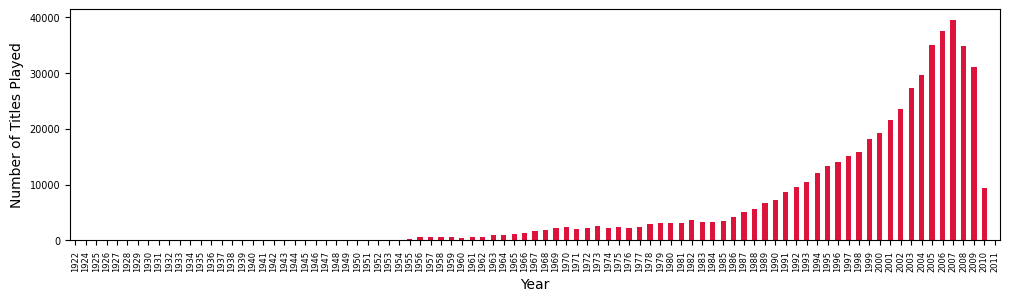

In [ ]:
# Create a barplot plot with y label as "number of titles played" and x -axis year
fig, ax = plt.subplots(figsize=(12, 3))
songs_count_year_df.plot(kind='bar', legend=False, color = 'crimson', ax = ax)

# Set the x label of the plot
plt.xlabel('Year')

# Set the y label of the plot
plt.ylabel('Number of Titles Played')

plt.xticks(fontsize=6)
plt.yticks(fontsize=7)

# Show the plot
plt.show()

#### **Observations and Insights:** #

The plot shows a clear trend that goes upward in the number of titles played over the years. This could lead us to think that music consumption has been increasing, specially from the years around the 90's.

However, there is a peak around 2007 with a following decline, which is not something expected specially when it comes to the data in 2010 and 2011. This drastic drop could indicate incomplete data, and this would directly translate into fewer 'modern' music recommendations.

#### Interacting users yearly

In [ ]:
 # Find out the number of users interacting with the music platform in a year

artist_count_year = df_final.groupby('year')['user_id'].count()
artist_count_year_df = pd.DataFrame(artist_count_year)
artist_count_year_df = artist_count_year_df.drop(artist_count_year.index[0]) # drop the first year index = 0

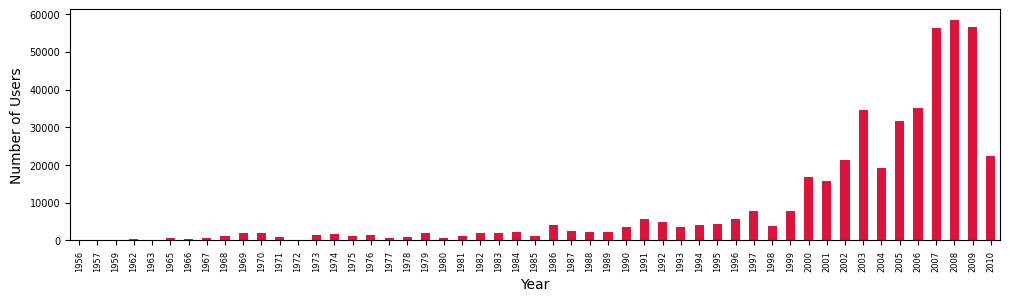

In [ ]:
# Create a barplot plot
fig, ax = plt.subplots(figsize=(12, 3))
artist_count_year_df.plot(kind='bar', legend=False, color = 'crimson', ax = ax)

# Set the x label of the plot
plt.xlabel('Year')

# Set the y label of the plot
plt.ylabel('Number of Users')

plt.xticks(fontsize=6)
plt.yticks(fontsize=7)

# Show the plot
plt.show()

By analyzing this plot, we can confirm that the number of users listening to streaming platforms has indeed increased over time, which supports the previous observation. However, the decline after 2009 remains unexpected.

We can also say that the sample taken from the original (merged) dataset appears to be representative of the overall population, since the number of titles played over time and number of users interacting over time is closely similar.

#### Popularity of Artists VS. Years

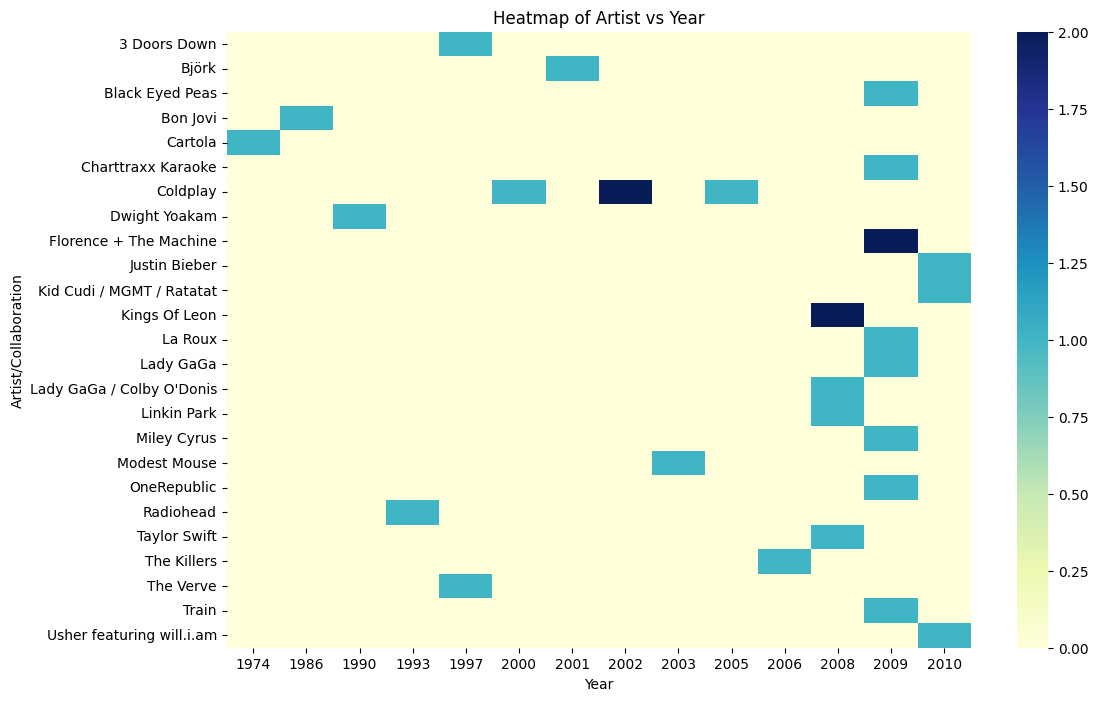

In [ ]:
top_30_df = top_10_songs_info[top_10_songs_info['year'] != 0]
top_30_df = top_30_df.sort_values(by = 'play_count', ascending = False).head(30)

crosstab = pd.crosstab(top_30_df['artist_name'], top_30_df['year'])

plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, cmap='YlGnBu', annot=False)
plt.title('Heatmap of Artist vs Year')
plt.xlabel('Year')
plt.ylabel('Artist/Collaboration')
plt.show()

From the heatmap we can see that artists like Coldplay how consistent activity across multiple years, indicating sustained popularity. This suggests that these band maintained a strong presence in the music scene over time, with multiple tracks being played across different periods. So we might expect so see them more often in the recommendations, as well as artists like Kings of Leon or Florence + The Machine due to high number of reproductions in specific years.

While some artists, such as 3 Doors Down and Bon Jovi, show spikes in specific years, likely corresponding to the release of particularly popular albums or singles during those times. This points to periods of peak popularity, followed by a potential decline in new releases or listening frequency. And with this being said, it is highly probable we will not see these artists in the recommendations provided by our models.

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.


## **Building various models**


---



### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [ ]:
# Calculating average play_count
avg_count = df_final.groupby('song_id')['play_count'].mean().reset_index()
avg_count.columns = ['song_id', 'avg_play_count']

# Calculating the frequency a song is played
freq_play = df_final.groupby('song_id')['play_count'].sum().reset_index()
freq_play.columns = ['song_id', 'freq_play_count']

In [ ]:
# Making a dataframe with the average_count and play_freq
final_play = pd.merge(avg_count, freq_play, on = 'song_id')

# Let us see the first five records of the final_play dataset
print(final_play.head(5))

   song_id  avg_play_count  freq_play_count
0        4        1.432692              149
1       11        1.898305              224
2       16        1.714844              439
3       17        1.880503              299
4       20        1.772414              257


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In this case, the main threshold will be 1, since the median play count is 1.

In [ ]:
# Build the function to find top n songs

def top_n_songs(df, n, min_interactions):
    # Finding products with a minimum number of playcounts
    interactions_filter = df[df['freq_play_count'] >= min_interactions]

    # Sorting values with respect to average play count
    sorted_rec = interactions_filter.sort_values(by='avg_play_count', ascending=False)

    return sorted_rec.index[:n]  # Return the top n products

In [ ]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 1))

[1839, 2259, 2152, 2560, 1636, 2143, 1256, 1453, 1502, 1333]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [ ]:
# Install the surprise package using pip

!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357275 sha256=a229a0c7c0958b40b1ff333e21edd40326441fc0b1ac0a2cab9a37ff447128ec
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering


### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

All of the metrics mentioned are commonly used for comparing model performance. However, since our objective is to recommend the top 10 songs to each user, precision, recall, and F1 Score should be prioritized. Given that F1 Score is the harmonic mean of precision and recall, it serves as a balanced metric and could be our primary comparison tool. This is because we need to ensure relevant products are recommended and viceversa.

In [ ]:
from collections import defaultdict
from surprise import accuracy

def precision_recall_at_k(model, testset, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    # Mean of all the predicted recalls
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    # Calculate and print RMSE
    accuracy.rmse(predictions)
    # Print the overall precision
    print('Precision: ', precision)
    # Print the overall recall
    print('Recall: ', recall)
    # Compute and print the F1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5.

* How precision and recall are affected by changing the threshold?
  As **precision** measures the proportion of relevant items (ie. songs) that the model predicts as relevant, when the threshold is increased, the model needs higher play counts to classify a song as relevant. This can increase precision, since fewer songs are considered relevant.

  On the other hand, as **recall** measures the proportion of relevant items that are correctly identified, when threshold is higher, as fewer songs are considered relevant, we might miss recommending relevant songs, so recall should tend to decrease.

* What is the intuition behind using the threshold value of 1.5?

  We know from previous descriptive statistics that the median play count is 1, but maybe the threshold was defined as something close to the average play count in the data, or based on the distribution of play counts, in the point where the distribution presents a bigger change.

In [ ]:
df_final['play_count'].mean()

1.6802993629304837

Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

You will also notice here that we read the dataset by providing a scale of ratings. However, as you would know, we do not have ratings data of the songs. In this case, we are going to use play_count as a proxy for ratings with the assumption that the more the user listens to a song, the higher the chance that they like the song

In [ ]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (0, 5))

# Loading the dataset
sampled_df = df_final.sample(frac=0.8, random_state=42)
data = Dataset.load_from_df(sampled_df[['user_id', 'song_id', 'play_count']], reader) # Take only "user_id","song_id", and "play_count"

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size = 0.4, random_state = 42) # Take test_size = 0.4, random_state = 42

**Think About It:** How changing the test size would change the results and outputs? If we think about how much percentage we give to the train-test sets, that percentage has a significant impact on the results.

For example, a smaller test size means more data is available for training the model. This generally allows the model to learn more patterns and relationships from the data, potentially leading to better performance on the training set. At the same time, if training size is really large, there is a risk of overfitting (and the contrary happens when we have a smaller training set).

In [ ]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options = sim_options, verbose = False, random_state = 1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user, testset) # Use sim_user_user model

RMSE: 1.1081
Precision:  0.393
Recall:  0.71
F_1 score:  0.506


**Observations and Insights:**
* RMSE: on average, the predictions are about 1.1 units away from the actual values
* Recall: Out of relevant products, 71% are recommended
* Precision: Out of all recommended products, 39.3% are relevant
* F1 Score: approximately half of the relevant products were recommended, and viceversa.

This is a good model overall, but could be better, so we'll try improving metrics by performing hyperparameter tuning.

In [ ]:
# List all users in the training set
all_users_in_trainset = [trainset.to_raw_uid(inner_uid) for inner_uid in trainset.all_users()]
#print(f"All users in the training set: {all_users_in_trainset}")

In [ ]:
# List all items in the training set
all_items_in_trainset = [trainset.to_raw_iid(inner_iid) for inner_iid in trainset.all_items()]
#print(f"All items in the training set: {all_items_in_trainset}")

In [ ]:
df_final[(df_final['user_id']==6958) & df_final['song_id']==93] #Just for proving interacted or non-interacted combinations to predict with

,user_id,song_id,play_count,title,release,artist_name,year


In [ ]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(61348, 6175, r_ui = 1, verbose = True) #randomly selected user 61348 and song ID 5375

user: 61348      item: 6175       r_ui = 1.00   est = 1.45   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=61348, iid=6175, r_ui=1, est=1.45, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(1553, 94, verbose = True)

user: 1553       item: 94         r_ui = None   est = 2.36   {'actual_k': 9, 'was_impossible': False}


Prediction(uid=1553, iid=94, r_ui=None, est=2.3563241704430844, details={'actual_k': 9, 'was_impossible': False})

**Observations and Insights:**

* For user (61348) that we knew had listened to the song (6175) once, the model predicted a play count of 1.45. Since this prediction rounds up to approximately 2, it suggests that the model may be slightly overestimating the actual play counts.

* For the user 1553 that has not previously listened to song 94, the model predicts that the user will likely play the song around 2 times.

Now, let's try to tune the model and see if we can improve the model performance.

In [ ]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30],
              'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson'],
                              'user_based': [True]}
              }


# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = 2)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0992798347266917
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson', 'user_based': True}}


In [ ]:
# Train the best model found in above gridsearch

# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Compute precision@k and recall@k
print('Optimized model performance:')
precision_recall_at_k(sim_user_user_optimized, testset)

Optimized model performance:
RMSE: 1.0976
Precision:  0.382
Recall:  0.873
F_1 score:  0.531


**Observations and Insights:**

* RMSE: As with the baseline model, on average, the predictions are about 1.1 units away from the actual values.
* Recall: Out of relevant products, 87.3% are recommended. This is a huge improvement over the baseline model, where 71% were recommended.
* Precision: Out of all recommended products, 38.2% are relevant. One decimal point less than the baseline model.
* F1 Score: more than half of the relevant products were recommended, and viceversa.

The optimized user-user model performs much better overall than the baseline user-user model.

In [ ]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.68   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.6815054801650462, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

In [ ]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 93, verbose = True)

user: 6958       item: 93         r_ui = None   est = 1.68   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=93, r_ui=None, est=1.6815054801650462, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations and Insights:**

In this optimized version of the user-user similarity-based model, for the user that had listened to the song 1671 twice, the prediction is 1.68 play counts, that rounded up would be approximately 2, which is very close to the real value.

For user 6958, who has not listened to song ID 93, the prediction is 1.68 play counts ~ 2 play counts.

Nonetheless, apparently user-user matrix is sparse and on average the model's predictions may be affected by not delivering very reliable recommendations. This may suggest that while the optimized model may perform well on observed data, it struggles a little with out-of-sample predictions where data is sparse.

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [ ]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[1, 2, 3, 4, 5]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [ ]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not played yet
    non_played_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

     # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_played_songs:

        # Predicting the users for those non played song ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returning top n highest predicted play_count songs for this user

In [ ]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user) # Using the same previously asked user 6958

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
x = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])
x

,song_id,predicted_play_count
0,6494,4.333333
1,6902,4.013972
2,5269,4.000000
3,9875,3.523166
4,8707,3.511628


In [ ]:
# Drop duplicates based on the 'song_id' column
x_specifics = pd.merge(x, df_final[['song_id','artist_name', 'title', 'release', 'year']].drop_duplicates(subset=['song_id']), how='left', on='song_id')

# Display the result
x_specifics

,song_id,predicted_play_count,artist_name,title,release,year
0,6494,4.333333,Smokey Robinson & The Miracles,I Second That Emotion,The Definitive Collection,1967
1,6902,4.013972,Jorge Gonzalez,Esta Es Para Hacerte Féliz,Esta Es Para Hacerte Feliz,0
2,5269,4.000000,Mickie Krause,Orange Trägt Nur Die Müllabfuhr (Go West),10 Jahre Gute Unterhaltung!,0
3,9875,3.523166,Brisa Roché,Intermission 1,The Chase,0
4,8707,3.511628,K-OS,EMCEE Murdah,Joyful Rebellion,2004


In [ ]:
# Reminding the maximum value of play_count
df_final['play_count'].max()

5

**Observations and Insights:**

Based on the strong similarities between the current user (6958) and other users who have played these songs frequently, the predictions are diverse.



### Correcting the play_counts and Ranking the above songs

In [ ]:
def ranking_songs(recommendations, final_play):
    # Extract the song IDs from the recommendations
    recommended_song_ids = [items[0] for items in recommendations]

    # Filter the final_play DataFrame to include only the recommended songs
    playing_count = final_play[final_play['song_id'].isin(recommended_song_ids)]

    # Sort the songs based on play frequencies
    ranked_songs = playing_count.sort_values('freq_play_count', ascending=False)[['song_id', 'freq_play_count']]

    # Merge with the recommended songs to get predicted play_counts
    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_play_count']), on='song_id', how='inner')

    # Correct the play counts by applying the correction formula
    ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['freq_play_count'])

    # Sort the songs based on corrected play counts
    ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending=False)

    return ranked_songs


**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

Practically speaking, it is also possible to add the quantity instead of subtracting it to get more optimistic predictions. But here we are subtracting this quantity as there are some songs with play counts of 5 and given the last filter we applied, it is not possible to have more than 5 playing counts for a song.

In [ ]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)

,song_id,freq_play_count,predicted_play_count,corrected_play_count
0,6494,283,4.333333,4.273890
4,6902,177,4.013972,3.938808
1,5269,228,4.000000,3.933773
2,9875,208,3.523166,3.453829
3,8707,203,3.511628,3.441442


**Observations and Insights:**

* Here, we see the play count frequency values for these songs are relatively high, ranging from 177 to 283, which implies these songs are popular among users, which might have influenced the model's predictions.

* The corrected play counts are slightly lower than the original predicted play counts. This indicates a balance between leveraging popularity and introducing a slight penalty to avoid over-recommending already popular content.

### Item Item Similarity-based collaborative filtering recommendation systems

In [ ]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the trainset, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1
precision_recall_at_k(sim_item_item, testset)

RMSE: 1.0657
Precision:  0.335
Recall:  0.573
F_1 score:  0.423


**Observations and Insights:**
* RMSE: Similar to user-user models, RMSE is 1.07 ~ 1.1, meaning that, on average, the predictions are about 1.1 units away from the actual values.

* Recall: Out of relevant products, 57.3% are recommended. This is a huge decline over both of the user-user models, where the lowest value was 71%.

* Precision: Out of all recommended products, 33.5% are relevant. Relatively close to the user-user case.

* F1 Score: less than half of the relevant products were recommended, and viceversa.

Overall, metrics are not competitive with user-user similarity-based models. Nonetheless we will continue to explore this approach as it might improve with hyperparameter tuning.

In [ ]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_item_item.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.40   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3971788903601838, details={'actual_k': 40, 'was_impossible': False})

In [ ]:
# Predict the play count for a user that has not listened to the song
sim_item_item.predict(6958, 93, verbose = True) # To have a better comparison measure we take the same user_id and song_id that user-user case

user: 6958       item: 93         r_ui = None   est = 1.20   {'actual_k': 26, 'was_impossible': False}


Prediction(uid=6958, iid=93, r_ui=None, est=1.1992764689789464, details={'actual_k': 26, 'was_impossible': False})

**Observations and Insights:**
* For user (6958) that we knew had listened to the song (1671) twice, the model predicted a play count of 1.4. It suggests that the model may be slightly underestimating the actual play counts.

* For the user 6958 that has not previously listened to song 93, the model predicts that the user will likely play the song around 1 time.

In [ ]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson'],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = 2)

# Fitting the data
gs.fit(data) # Use entire data for GridSearch

# Find the best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0593779195107
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False, 'min_support': 2}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [ ]:
# Apply the best model found in the grid search
sim_options = {'name': 'cosine',
               'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 6, random_state = 1, verbose = False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Compute precision@k and recall@k
print('Optimized model performance:')
precision_recall_at_k(sim_item_item_optimized, testset)

Optimized model performance:
RMSE: 1.1065
Precision:  0.391
Recall:  0.715
F_1 score:  0.506


**Observations and Insights:**
* RMSE: Similar to user-user models and the baseline item-item model, RMSE is 1.1, meaning that, on average, the predictions are 1.1 units away from the actual values.

* Recall: Out of relevant products, 71.5% are recommended. It reflects a big advancement over the baseline model with a recall of 57.3%. But it is far from the 87.3% obtained with optimized user-user collaborative filtering model. It will be crucial to see the results in the out-of-sample predictions though.

* Precision: Out of all recommended products, 39.1% are relevant (enhancement over 33% from the baseline), and close to the user-user optimized case of 38%.

* F1 Score: half of the relevant products were recommended, and viceversa. Although optimized user-user model presents a better metric of ~53%.

In [ ]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3354142592871663, details={'actual_k': 30, 'was_impossible': False})

In [ ]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.57   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5666666666666667, details={'actual_k': 30, 'was_impossible': False})

**Observations and Insights:**

* For user (6958) that we knew had listened to the song (1671) twice, the model predicted a play count of 1.34, which is approximately 1. Hence the model is slightly underestimating the actual play counts, a little more than the previous tested models.

* For the user 6958 that has not previously listened to song 3232, the model predicts that the user will likely play the song around 1 time.

It is also important to highlight that while the optimized user-user struggled with out-of-sample predictions where data is sparse, this is not the case. Predictions are more reliable in the optimized item-item model compared to optimized user-user model.

In [ ]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, 5)

[1, 4, 7, 13, 17]

In [ ]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item) # Using the same previously asked user 6958

In [ ]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
x = pd.DataFrame(recommendations, columns = ['song_id', 'predicted_play_count'])
x

,song_id,predicted_play_count
0,7596,3.423080
1,6749,3.000000
2,7560,3.000000
3,2645,2.777187
4,7459,2.666667


In [ ]:
# Drop duplicates based on the 'song_id' column
x_specifics = pd.merge(x, df_final[['song_id','artist_name', 'title', 'release', 'year']].drop_duplicates(subset=['song_id']), how='left', on='song_id')

# Display the result
x_specifics

,song_id,predicted_play_count,artist_name,title,release,year
0,7596,3.423080,Eminem,Marshall Mathers,The Marshall Mathers LP,2000
1,6749,3.000000,The Lonely Island,Punch You In The Jeans,Incredibad,2009
2,7560,3.000000,Dierks Bentley,Sideways,Feel That Fire,2009
3,2645,2.777187,Natasha Bedingfield,Unwritten,Divas Collection,2004
4,7459,2.666667,Slightly Stoopid,Closer To The Sun,Winter Tour '05 - '06,2005


In [ ]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)

,song_id,freq_play_count,predicted_play_count,corrected_play_count
4,7596,154,3.423080,3.342498
1,7560,190,3.000000,2.927452
2,6749,163,3.000000,2.921674
0,2645,197,2.777187,2.705939
3,7459,163,2.666667,2.588341


**Observations and Insights:**

The corrected play counts are slightly lower than the original predicted play counts, but the adjustment is specially pronounced for the higher play frequencies, as seen with song 7596.

Overall the model provides a diverse set of recommendations.

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [ ]:
# Build baseline model using svd
svd = SVD(random_state = 1)

svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd, testset)

RMSE: 1.0527
Precision:  0.396
Recall:  0.652
F_1 score:  0.493


* RMSE: Similar to user-user and item-item models, RMSE is ~1.1, meaning that, on average, the predictions are 1.1 units away from the actual values.

* Recall: Out of relevant products, 65.2%. It is far from the 87.3% obtained with optimized user-user collaborative filtering model.

* Precision: Out of all recommended products, 39.6% are relevant. Up to this point all models have generated a similar precision metric result, so this might not be the best metric to compare.

* F1 Score: half of the relevant products were recommended, and viceversa.

In [ ]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.21   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2058409573947362, details={'was_impossible': False})

In [ ]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.63   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6251260707812767, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30],
              'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0378382930571026
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


In [ ]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.01, reg_all = 0.2, random_state = 1)

# Train the algorithm on the trainset
svd_optimized = svd_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_optimized, testset)

RMSE: 1.0386
Precision:  0.384
Recall:  0.643
F_1 score:  0.481


In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.4778005819589564, details={'was_impossible': False})

In [ ]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.58   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5809227901664318, details={'was_impossible': False})

**Observations and Insights:**

Recall metric for both of matrix factorization models is definitely not good at all, the case is such that the recall value for both of these models is the lowest among all the previously tested models. Even with that observation, for the user we know has listened to song 1671 twice, the predicted play count is 1.48, which is a little closer to 2 than to 1. Given that, it performs slightly better out-of-sample than the majority of the previous approaches.

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, svd_optimized) # Using the same previously asked user 6958

In [ ]:
# Ranking songs based on above recommendations
ranking_songs(recommendations, final_play)

,song_id,freq_play_count,predicted_play_count,corrected_play_count
1,7224,727,3.022870,2.985782
3,8738,185,2.617852,2.544330
2,234,189,2.404325,2.331585
4,8298,184,2.322203,2.248482
0,614,2838,2.220472,2.201701


**Observations and Insights:**
So far, none of the models have produced the same top 5 recommended songs. Besides, this particular model recommends songs that are very frequently played, but predicts a lower number of play counts than the other approaches tested.

As the previous models, this one also makes a slight adjustment below the original predictions.

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [ ]:
# Make baseline clustering model
cluster_based = CoClustering(random_state = 1)

cluster_based.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(cluster_based, testset)

RMSE: 1.0816
Precision:  0.379
Recall:  0.603
F_1 score:  0.465


In [ ]:
# Making prediction for user_id 6958 and song_id 1671
cluster_based.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.02   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.0235025657496095, details={'was_impossible': False})

In [ ]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
cluster_based.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.64   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.636374920610872, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [ ]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8],
              'n_cltr_i': [5, 6, 7, 8],
              'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0939924937796408
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [ ]:
# Train the tuned Coclustering algorithm
cluster_based_optimized = CoClustering(n_epochs = 20, n_cltr_u = 5, n_cltr_i = 5, random_state = 1)

# Train the algorithm on the trainset
cluster_based_optimized = cluster_based_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(cluster_based_optimized, testset)

RMSE: 1.1028
Precision:  0.38
Recall:  0.579
F_1 score:  0.459


**Observations and Insights:**

The recall of 57.9% is closer to the lower recall metric provided by the baseline item-item model of 57.3% which is the lowest result of all. Interestingly, its performance is poorer than the baseline clustering-based recommendation system model. So this model is not strong and is not competitive either over the other approaches.

In [ ]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
cluster_based_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.04   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.0400707063112364, details={'was_impossible': False})

In [ ]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
cluster_based_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.20   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.1980899547225086, details={'was_impossible': False})

**Observations and Insights:**
As indicated in the metrics output for this model, this performance is clearly the worst among all models, with a prediction of 1.04 play counts for a user who we know has played the song 2 times.

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, cluster_based_optimized) # Using the same previously asked user 6958

### Correcting the play_count and Ranking the above songs

In [ ]:
# Ranking songs based on the above recommendations
ranking_songs(recommendations, final_play)

,song_id,freq_play_count,predicted_play_count,corrected_play_count
4,234,189,3.419119,3.346380
1,8324,600,3.252453,3.211628
0,6450,655,3.209290,3.170217
2,891,249,3.112430,3.049058
3,1705,209,3.034199,2.965027


**Observations and Insights:**

So far, none of the models have produced the same top 5 recommended songs. Besides, this particular model recommends songs that are very frequently played, but predicts a lower number of play counts than the other approaches tested, not as low as the matrix factorization model though.

As the previous models, this one also makes a slight adjustment below the original predictions.

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [ ]:
df_small = pd.DataFrame(df_final)

In [ ]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small['text'] = df_small['title'] + ' ' + df_small['release'] + ' ' + df_small['artist_name']
df_small.head(2)

,user_id,song_id,play_count,title,release,artist_name,year,text
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove Thicker Than Water Jack Johnson
2,54961,736,1,Stronger,Graduation,Kanye West,2007,Stronger Graduation Kanye West


In [ ]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small = df_small.drop_duplicates(subset = 'title')

# Set the title column as the index
df_small.set_index('title', inplace = True)

# See the first 5 records of the df_small dataset
df_small.head(5)

,user_id,song_id,play_count,text
title,,,,
The Cove,54961,153,1,The Cove Thicker Than Water Jack Johnson
Stronger,54961,736,1,Stronger Graduation Kanye West
Constellations,54961,750,1,Constellations In Between Dreams Jack Johnson
Learn To Fly,54961,1188,1,Learn To Fly There Is Nothing Left To Lose Foo...
Paper Gangsta,54961,1536,1,Paper Gangsta The Fame Monster Lady GaGa


In [ ]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

print(indices.head())

0          The Cove
1          Stronger
2    Constellations
3      Learn To Fly
4     Paper Gangsta
Name: title, dtype: object


In [ ]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


We will create a **function to pre-process the text data:**

In [ ]:
# Create a function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words('english')]  # Use stopwords of english

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [ ]:
# Create tfidf vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(df_small['text'])

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_array = tfidf_matrix.toarray()

In [ ]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(tfidf_array)

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [ ]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [ ]:
# Make the recommendation for the song with title 'Learn To Fly'
recommended_songs = recommendations('Learn To Fly', similar_songs)
print(recommended_songs)

[11, 1084, 1079, 659, 564, 933, 1642, 1769, 662, 1527]
['Breakout', 'Big Me', 'All My Life', 'Everlong', 'The Pretender', 'Just Lose It', 'You Learn (Album Version)', 'Alright', 'Lost In The Plot', 'Tides']


**Observations and Insights:**

As content-based recommendation systems analyze the characteristics of items to recommend items that are similar to those a user has interacted with in the past, the system recommends new items that have similar features to the ones the user likes, but we may miss the oportunity to recommend new songs that users have not interacted with yet.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:

The chosen measure of success in this case was the Recall metric, as it showed the most significant variation across the different models. Recall is particularly important in this context because it measures the ability of the recommendation system to correctly identify all relevant items (in this case, songs) for each user. In scenarios where the primary goal is to ensure that users are exposed to as many relevant options as possible, recall is a critical metric.


- How do different techniques perform? Which one is performing relatively better?

  * **Tuned User-User Model (87.3% recall)** shows the highest recall, indicating that it captures more relevant items for users compared to other models. However, this result is flagged as unreliable due to insufficient neighbors, suggesting that the model may struggle with predictions for users or items that lack enough interaction data.

  * **Tuned Item-Item Model (71.5% recall)** is the next best-performing model, with a significant improvement over its baseline (57.3%). This indicates that tuning the item-item model effectively enhances its ability to recall relevant items.

  * **Baseline User-User Model (71% recall)** also performs well and is more reliable than the tuned version given that it doesn’t have the same issues with insufficient neighbors.

  *	**Matrix Factorization Models (SVD)**: The recall of the baseline SVD model (65.2%) is slightly better than the optimized SVD (64.3%), suggesting that the tuning may not have been effective or could have led to overfitting.

  *	**Cluster-Based Models**: Both the baseline and optimized cluster-based models perform below expectations, with recalls of 60.3% and 57.9%, respectively. The optimized version underperforms even compared to its baseline.

* Is there scope to improve the performance further?

  * There is definitely a scope to improve the performance further. For instance, by combining the strengths of user-user and item-item models, or blending content-based filtering with collaborative filtering, could potentially yield better recall and overall performance.
  * Incorporating more content-based features such as song metadata (genre, percentage of the song that was actually played, lyrics, etc.) into the recommendation process could provide a more robust model, especially for new users or items with little interaction data.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

  * The data shows that a significant number of users that have low play counts for most songs, indicating that a few songs dominate user interactions (individually). This suggests that users tend to listen to a small subset of songs repeatedly, which could impact the diversity of recommendations. But also highlights a potential to explore content-based recommendation systems to show users new songs they might like.

  * Different models, including user-user, item-item, SVD, and clustering-based recommendations, show varying levels of recall. The tuned user-user model achieved the highest recall but also faced reliability issues due to insufficient data (“not enough neighbors”), highlighting the trade-offs between model complexity and data quality.

  * Recommendations have been primarily based on play counts (collaborative filtering), with limited use of content-based features such as song metadata. Incorporating content-based features could enhance the recommendation system, particularly for new users or less popular songs where interaction data is sparse.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

Speaking of the models trained as part of the exercise, the tuned user-user model shows the highest recall but suffers from reliability issues. Thus, the tuned item-item model is the most consistent high-performing model without reliability flags.

More than that, given that certain songs have very high play counts, indicating their popularity across a wide user base, these songs are likely to appear frequently in recommendations, but the system must balance this with the need to introduce users to new content. Under that scenario, the firm might benefit from mixing collaborative-filtering techniques and content-based models.

The varying performance across different models suggests that a hybrid approach, combining collaborative filtering with content-based methods, might provide the best balance between recall and overall user satisfaction. This approach could help address the shortcomings of individual models, such as the cold start problem and the need for sufficient neighbors in user-user models.

## **Appendix**

##Figure 1. Comparison of model's metrics

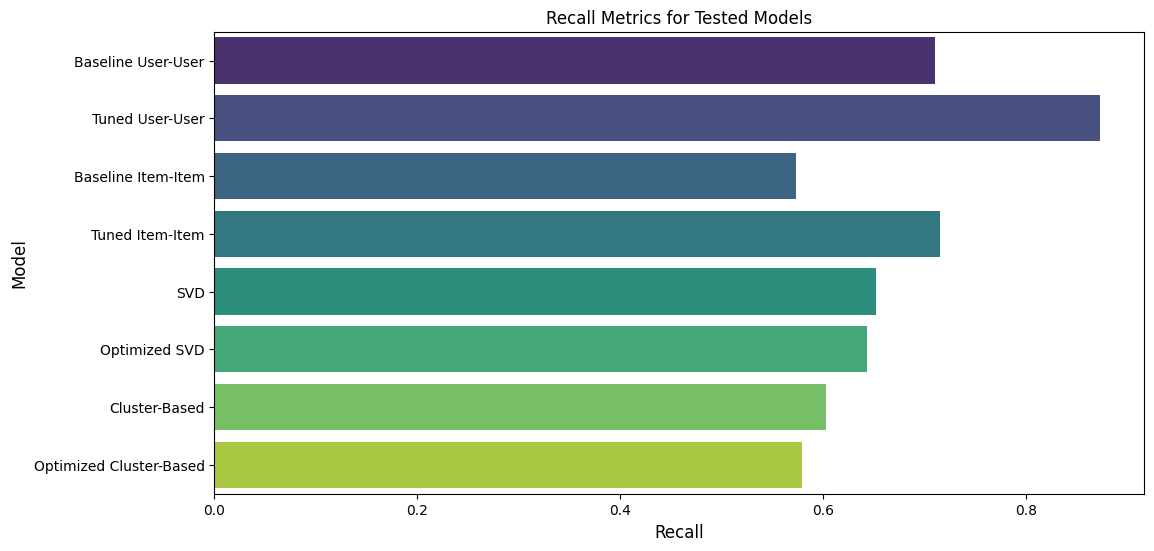

In [ ]:
# Data for recall metrics
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Baseline User-User', 'Tuned User-User', 'Baseline Item-Item', 'Tuned Item-Item', 'SVD', 'Optimized SVD', 'Cluster-Based', 'Optimized Cluster-Based']
recall_scores = [0.71, 0.873, 0.573, 0.715, 0.652, 0.643, 0.603, 0.579]

# Create a DataFrame for better plotting
import pandas as pd
recall_df = pd.DataFrame({
    'Model': models,
    'Recall': recall_scores
})

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Recall', y='Model', data=recall_df, palette='viridis')

# Add a title and labels
plt.title('Recall Metrics for Tested Models', fontsize=12)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Model', fontsize=12)

# Display the plot
plt.show()